In [1]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats # The statistical module used to run chi square test
import requests
from concurrent.futures import ThreadPoolExecutor, as_completed


In [2]:
#read csv
accidental_df=pd.read_csv("Resources/combined_data.csv")
accidental_df.head()

/var/folders/p1/sd0bq34d5xx6bcr_yjx4qcc40000gn/T/ipykernel_32052/508349301.py:2: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  accidental_df=pd.read_csv("Resources/combined_data.csv")


,St Case Num,Age,Sex,Race,Seat Pos,AirBag Deployed,Is Fatal,Is Drug,Is Drunk,BAC,Case Date,Make Name,Model Name,Model Year,State,County
0,63463,32,1,Not a Fatality (not Applicable),"Front Seat, Left Side",False,False,No (drugs not involved),Yes (Alcohol Involved),0.000 % BAC,2017-12-02,Other Make,Other Make Hino,2015,California,ALAMEDA (1)
1,63463,43,1,Not a Fatality (not Applicable),"Front Seat, Right Side",False,False,Not Reported,Not Reported,Test Not Given,2017-12-02,Other Make,Other Make Hino,2015,California,ALAMEDA (1)
2,120156,30,1,White,"Front Seat, Left Side",True,True,Unknown,Unknown (Police Reported),0.130 % BAC,2017-01-30,BMW,BMW 6-series,2013,Florida,WALTON (131)
3,120156,33,1,Not a Fatality (not Applicable),"Front Seat, Right Side",True,False,Not Reported,Not Reported,Test Not Given,2017-01-30,BMW,BMW 6-series,2013,Florida,WALTON (131)
4,310001,999,9,Not a Fatality (not Applicable),"Front Seat, Left Side",True,False,Unknown,Unknown (Police Reported),Test Not Given,2017-01-01,Unknown Make,"Unknown Make Unknown (as to automobile, motore...",9999,Nebraska,SCOTTS BLUFF (157)


In [3]:
#extracting the year, and adding a 'year' column
#https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.year.html
accidental_df['Year'] = pd.to_datetime(accidental_df['Case Date']).dt.year

#remove 2017 since it doesn't have many cases in the data, probably incomplete
clean_df = accidental_df[accidental_df['Year'] != 2017]

#group by year column we just created and count the nuber of accidents that occured for that year
accidental_peryear_df=clean_df.groupby('Year').size()
accidental_peryear_df.head()


Year
2018    45242
2019    44402
2020    47241
2021    51318
dtype: int64

 Were there more/less crashes during covid while majority of the people wfh?

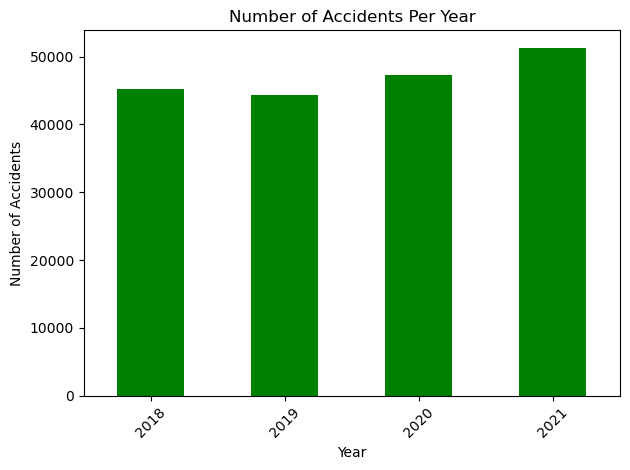

In [4]:
#Plot the results in a bar graph form
accidental_peryear_df.plot(kind='bar', color='green')
plt.title('Number of Accidents Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.tight_layout()
#save the figure
#plt.savefig("output_data/Fig2.png")
plt.show()



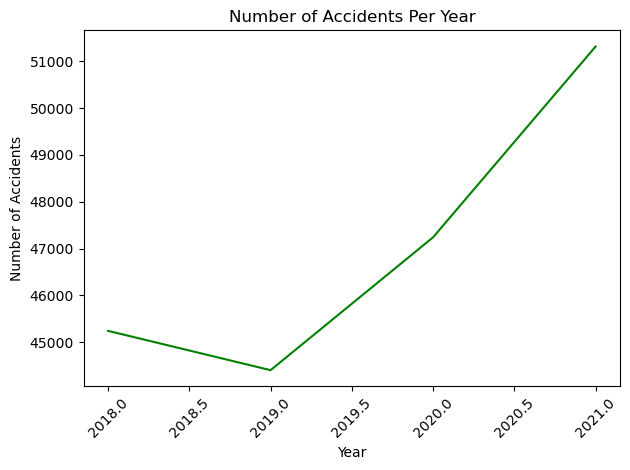

In [5]:
#Plot the results in a bar graph form
accidental_peryear_df.plot(kind='line', color='green')
plt.title('Number of Accidents Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.tight_layout()
#save the figure
#plt.savefig("output_data/Fig2.png")
plt.show()

Answer: 
The graph indicates an increase in accidents following covid-19. This could be the result of several factors during that time frame: individuals having additional disposable income from stimulus checks or savings accrued by cutting down on commuting, parking, and other related expenses. Allowing for an increase in vehicle purchases that led to more probabilities in car accidents.
ex:https://fred.stlouisfed.org/series/DTCTLVEUANQ

1. What weather condition has more fatal crashes?
2. Is there a correlation between the day of the week when these crashes occur?

In [6]:
#extracting the year, and adding a 'year' column
accidental_df['Day'] = pd.to_datetime(accidental_df['Case Date']).dt.day_name()

#remove 2017 since it doesn't have many cases in the data, probably incomplete
clean_daydf = accidental_df[accidental_df['Year'] != 2017]

clean_daydf.head()

,St Case Num,Age,Sex,Race,Seat Pos,AirBag Deployed,Is Fatal,Is Drug,Is Drunk,BAC,Case Date,Make Name,Model Name,Model Year,State,County,Year,Day
18,120018,36,2,Not a Fatality (not Applicable),"Front Seat, Left Side",True,False,Reported as Unknown,Reported as Unknown,0.080 % BAC,2018-01-01,Pontiac,Pontiac Grand Prix (FWD),2001,Florida,DUVAL (31),2018,Monday
19,120018,41,1,Black,"Front Seat, Right Side",False,True,Not Reported,Not Reported,Positive Reading with No Actual Value,2018-01-01,Pontiac,Pontiac Grand Prix (FWD),2001,Florida,DUVAL (31),2018,Monday
20,120018,11,1,Not a Fatality (not Applicable),"Second Seat, Middle",False,False,Not Reported,Not Reported,Test Not Given,2018-01-01,Pontiac,Pontiac Grand Prix (FWD),2001,Florida,DUVAL (31),2018,Monday
21,120018,2,2,Not a Fatality (not Applicable),"Second Seat, Left Side",False,False,Not Reported,Not Reported,Test Not Given,2018-01-01,Pontiac,Pontiac Grand Prix (FWD),2001,Florida,DUVAL (31),2018,Monday
22,120396,29,1,Not a Fatality (not Applicable),"Front Seat, Left Side",False,False,Yes (drugs involved),Yes (Alcohol Involved),0.191 % BAC,2018-01-01,Toyota,Toyota Corolla,2008,Florida,PALM BEACH (99),2018,Monday


In [7]:
#Group by the day so we get the count of accidents that happened per day.
accidents_byday_df = clean_daydf.groupby('Day').size()
#Sort by day
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
#apply the new sorted index
accidents_byday_df=accidents_byday_df.reindex(order)
accidents_byday_df.head()

Day
Monday       23889
Tuesday      22796
Wednesday    23041
Thursday     24601
Friday       29263
dtype: int64

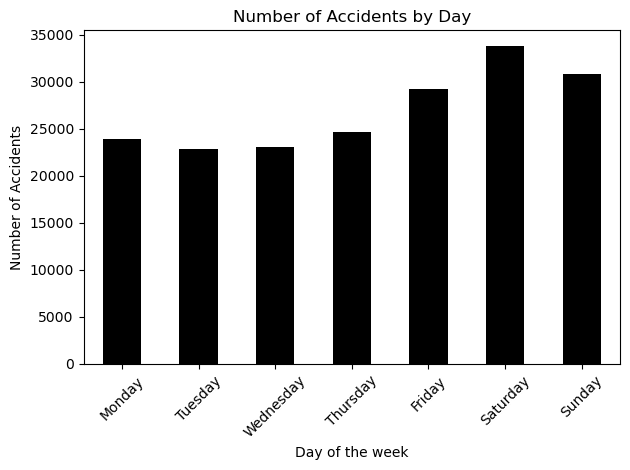

In [8]:
#Plot the results in a bar graph form
accidents_byday_df.plot(kind='bar', color='black')
plt.title('Number of Accidents by Day')
plt.xlabel('Day of the week')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.tight_layout()
#save the figure
#plt.savefig("output_data/Fig2.png")
plt.show()

In [9]:
#Chi Square test
#Setup the dataframe
observed = pd.Series([23889, 22796, 23041, 24601, 29263, 33760, 30853], index=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
chi_df=pd.DataFrame([observed]).T #transposes the series values
#figure out the expected
total_observed= observed.sum()
expected= total_observed/7
# Add a column whose default values are the expected values
chi_df[1]=expected
# Rename columns
chi_df.columns = ["observed", "expected"]
chi_df

,observed,expected
Monday,23889,26886.142857
Tuesday,22796,26886.142857
Wednesday,23041,26886.142857
Thursday,24601,26886.142857
Friday,29263,26886.142857
Saturday,33760,26886.142857
Sunday,30853,26886.142857


In [10]:
# With 7 rows, the degree of freedom is 7-1 = 6
# With a p-value of 0.05, the confidence level is 1.00-0.05 = 0.95.
critical_value = stats.chi2.ppf(q = 0.95, df = 6)
critical_value

12.591587243743977

In [11]:

stats.chisquare(chi_df['observed'], chi_df['expected'])

Power_divergenceResult(statistic=4253.285919990648, pvalue=0.0)

chi square test: 
rejects the null nypothesis. 

Answer:
Weekends have the highest number of accidents of the week. Saturday being at the top. With majority of the population being off from work/school and traveling to destinations for fun during their days off it increases the amount of vehicles on the road and also potential traffic accidents due to volume.


In [12]:
#extracting the year, and adding a 'year' column
accidental_df['Month'] = pd.to_datetime(accidental_df['Case Date']).dt.month_name()

#remove 2017 since it doesn't have many cases in the data, probably incomplete
clean_monthdf = accidental_df[accidental_df['Year'] != 2017]

clean_monthdf.head()

,St Case Num,Age,Sex,Race,Seat Pos,AirBag Deployed,Is Fatal,Is Drug,Is Drunk,BAC,Case Date,Make Name,Model Name,Model Year,State,County,Year,Day,Month
18,120018,36,2,Not a Fatality (not Applicable),"Front Seat, Left Side",True,False,Reported as Unknown,Reported as Unknown,0.080 % BAC,2018-01-01,Pontiac,Pontiac Grand Prix (FWD),2001,Florida,DUVAL (31),2018,Monday,January
19,120018,41,1,Black,"Front Seat, Right Side",False,True,Not Reported,Not Reported,Positive Reading with No Actual Value,2018-01-01,Pontiac,Pontiac Grand Prix (FWD),2001,Florida,DUVAL (31),2018,Monday,January
20,120018,11,1,Not a Fatality (not Applicable),"Second Seat, Middle",False,False,Not Reported,Not Reported,Test Not Given,2018-01-01,Pontiac,Pontiac Grand Prix (FWD),2001,Florida,DUVAL (31),2018,Monday,January
21,120018,2,2,Not a Fatality (not Applicable),"Second Seat, Left Side",False,False,Not Reported,Not Reported,Test Not Given,2018-01-01,Pontiac,Pontiac Grand Prix (FWD),2001,Florida,DUVAL (31),2018,Monday,January
22,120396,29,1,Not a Fatality (not Applicable),"Front Seat, Left Side",False,False,Yes (drugs involved),Yes (Alcohol Involved),0.191 % BAC,2018-01-01,Toyota,Toyota Corolla,2008,Florida,PALM BEACH (99),2018,Monday,January


In [13]:
#Group by the day so we get the count of accidents that happened per month.
accidents_bymonth_df = clean_monthdf.groupby('Month').size()
#Sort by day
order_months = ['January', 'February', 'March', 'April', 'May', 'June','July', 'August', 'September', 'October', 'November', 'December']
#apply the new sorted index
accidents_bymonth_df=accidents_bymonth_df.reindex(order_months)
accidents_bymonth_df.head()

Month
January     13644
February    12296
March       13794
April       13817
May         16495
dtype: int64

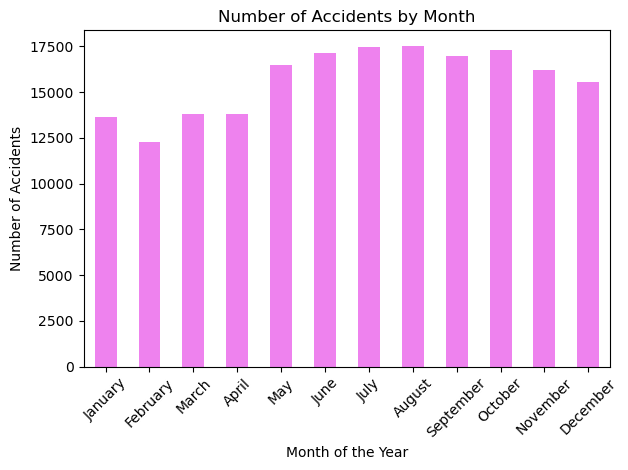

In [14]:
#Plot the results in a bar graph form
accidents_bymonth_df.plot(kind='bar', color='violet')
plt.title('Number of Accidents by Month')
plt.xlabel('Month of the Year')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.tight_layout()
#save the figure
#plt.savefig("output_data/Fig2.png")
plt.show()

In [15]:
accidents_bymonth_df.values

array([13644, 12296, 13794, 13817, 16495, 17117, 17456, 17507, 16971,
       17315, 16221, 15570])

In [16]:
#Chi Square test
#Setup the dataframe
observed2 = pd.Series([13644, 12296, 13794, 13817, 16495, 17117, 17456, 17507, 16971, 17315, 16221, 15570], index=['January', 'February', 'March', 'April', 'May', 'June','July', 'August', 'September', 'October', 'November', 'December'])
chi_df2=pd.DataFrame([observed2]).T #transposes the series values
#figure out the expected
total_observed2= observed2.sum()
expected2= total_observed2/12
# Add a column whose default values are the expected values
chi_df2[1]=expected2
# Rename columns
chi_df2.columns = ["observed", "expected"]
chi_df2

,observed,expected
January,13644,15683.583333
February,12296,15683.583333
March,13794,15683.583333
April,13817,15683.583333
May,16495,15683.583333
June,17117,15683.583333
July,17456,15683.583333
August,17507,15683.583333
September,16971,15683.583333
October,17315,15683.583333


In [17]:
# With 7 rows, the degree of freedom is 12-1 = 11
# With a p-value of 0.05, the confidence level is 1.00-0.05 = 0.95.
critical_value2 = stats.chi2.ppf(q = 0.95, df = 11)
critical_value2

19.67513757268249

In [18]:
stats.chisquare(chi_df2['observed'], chi_df2['expected'])

Power_divergenceResult(statistic=2326.6589108568933, pvalue=0.0)

June -August months are seasonally the busiest for tourist/vacations that cause traffic volume to increase and may result to more probabilities of car accidents. October may be caused by a weather change or daylight savings change that may need to be investigated further as to why it is one of the top months of the year for car acciedents to occur. 

In [20]:
crashes1_df=pd.read_csv("crash_details.csv")
crashes1_df.head()

,CaseYear,DAY_WEEK,DAY_WEEKNAME,HOUR,LATITUDE,LONGITUD,MonthName,ROUTENAME,STATENAME,ST_CASE
0,2019,1,Sunday,2,35.052278,-89.983797,September,Local Street - Municipality,Tennessee,470714
1,2018,2,Monday,3,30.766661,-83.769253,June,County Road,Georgia,130616
2,2018,7,Saturday,1,37.364053,-89.155386,November,Interstate,Illinois,170825
3,2019,7,Saturday,11,29.979028,-95.253997,April,Local Street - Municipality,Texas,480881
4,2020,4,Wednesday,11,28.121200,-80.630911,February,U.S. Highway,Florida,120420


In [22]:
#remove 2017 since it doesn't have many cases in the data, probably incomplete
clean_crash_df = crashes1_df[crashes1_df['CaseYear'] != 2017]

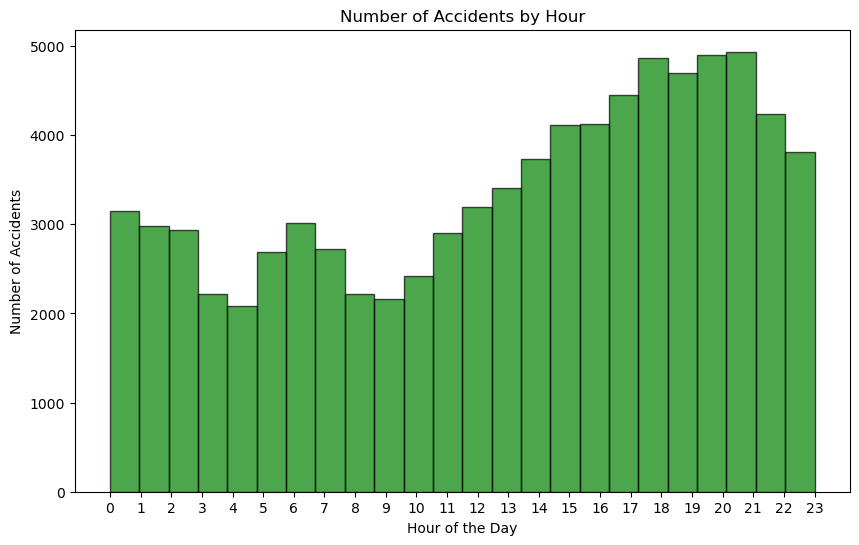

In [32]:
plt.figure(figsize=(10, 6))
plt.hist(clean_crash_df['HOUR'], bins=24, alpha=0.7, color='green', edgecolor='black')

#title and labels
plt.title('Number of Accidents by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Accidents')
plt.xticks(range(0, 24))  #tick for every hour (24hour clock)

# Show the plot
plt.show()

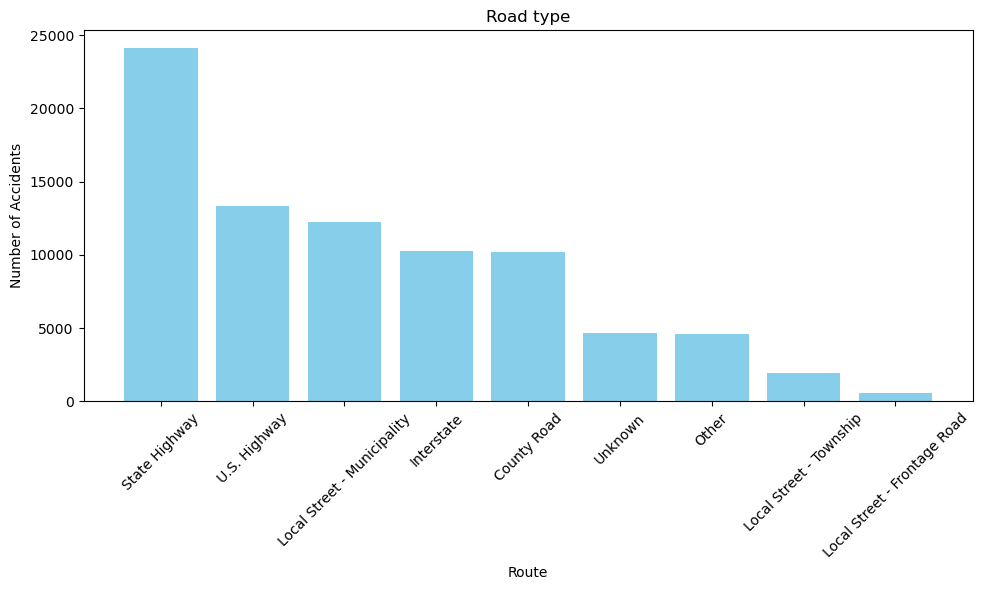

In [37]:
route = crashes1_df['ROUTENAME'].value_counts()

#bar chart
plt.figure(figsize=(10, 6))
plt.bar(route.index, route.values, color='skyblue')

#title and labels
plt.title('Road type')
plt.xlabel('Route')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45) 

# Show plot
plt.tight_layout() 
plt.show()

Analysis: 
Majority of accidents happen in state highways.This could be for many factors that include aggressive driving over speed limits, higher traffic volumes on these roads since everyone uses it to connect between cities, suburbs, and states.

In [35]:
summary1_df=pd.read_csv("summary_details.csv")
summary1_df.head()

/var/folders/p1/sd0bq34d5xx6bcr_yjx4qcc40000gn/T/ipykernel_32052/3532075798.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  summary1_df=pd.read_csv("summary_details.csv")


,CaseYear,DAY_WEEK,DAY_WEEKNAME,HOUR,LATITUDE,LONGITUD,MonthName,ROUTENAME,STATENAME,ST_CASE,WEATHER2NAME,WEATHERNAME
0,2020,6,Friday,3,30.332764,-97.686125,July,Local Street - Frontage Road,Texas,482117,NaN,Clear
1,2020,4,Wednesday,11,28.121200,-80.630911,February,U.S. Highway,Florida,120420,NaN,Cloudy
2,2018,7,Saturday,1,37.364053,-89.155386,November,Interstate,Illinois,170825,No Additional Atmospheric Conditions,Clear
3,2019,1,Sunday,2,35.052278,-89.983797,September,Local Street - Municipality,Tennessee,470714,No Additional Atmospheric Conditions,Clear
4,2017,7,Saturday,5,37.824967,-122.313753,December,Interstate,California,63463,No Additional Atmospheric Conditions,Clear


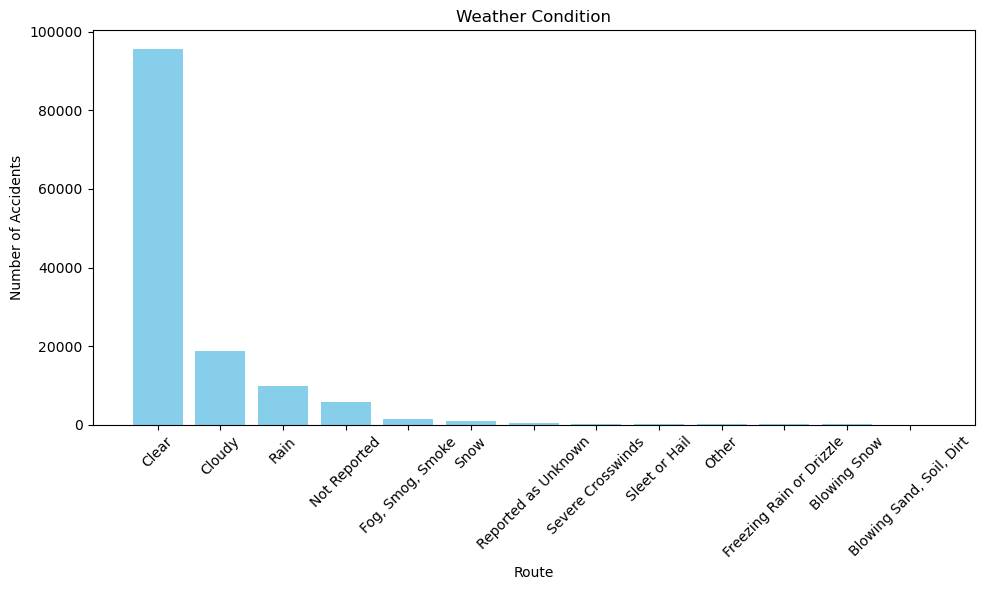

In [38]:
weather_condition= summary1_df['WEATHERNAME'].value_counts()

#bar chart
plt.figure(figsize=(10, 6))
plt.bar(weather_condition.index, weather_condition.values, color='skyblue')

#title and labels
plt.title('Weather Condition')
plt.xlabel('Route')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45) 

# Show plot
plt.tight_layout() 
plt.show()

Analysis:
All weather condtions were clear during the time of the crash. Drivers may be more cautious during other weather conditions. Summmer season is also the time when there are more clear skies and the highest traffic volume.
Challenge: Utilizing he lat and long in the csv would cost money to retrieve the weather history for all of these with the weather API. 